In [2]:
#
#The Deutsch-Josza algorithm, first introduced in Reference [1], was
#the first example of a quantum algorithm that performs better than the best classical algorithm.
#It showed that there can be advantages in using a quantum computer as
#a computational tool for a specific problem

In [3]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [13]:
# set the length of the $n$-bit string. 
n = 2

# set the oracle, b for balanced, c for constant
oracle = "c"

# if the oracle is balanced, set the hidden bitstring, b
if oracle == "b":
    b = 3 # np.random.randint(1,2**n) uncomment for a random value

# if the oracle is constant, set c = 0 or 1 randomly.
if oracle == "c":
    c = np.random.randint(2)

In [14]:
# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)

djCircuit = QuantumCircuit(qr, cr)
barriers = True

# Since all qubits are initialized to |0>, we need to flip the second register qubit to the the |1> state
djCircuit.x(qr[n])

# Apply barrier 
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to all qubits
djCircuit.h(qr)    
    
# Apply barrier 
if barriers:
    djCircuit.barrier()

# Query the oracle 
if oracle == "c": # if the oracle is constant, return c
    if c == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.iden(qr[n])
else: # otherwise, the oracle is balanced and it returns the inner product of the input with b (non-zero bitstring) 
    for i in range(n):
        if (b & (1 << i)):
            djCircuit.cx(qr[i], qr[n])

# Apply barrier 
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to the first register after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])

# Measure the first register
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

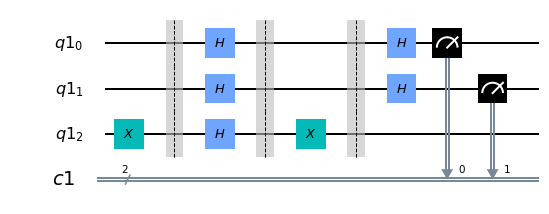

In [15]:
djCircuit.draw(output='mpl')

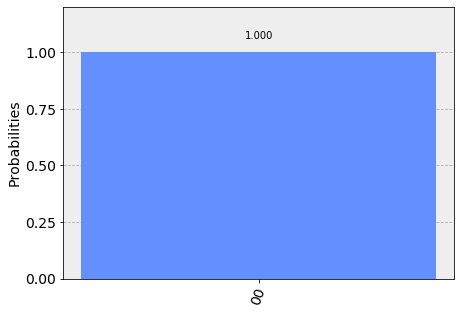

In [16]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [18]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_vigo


In [19]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(djCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


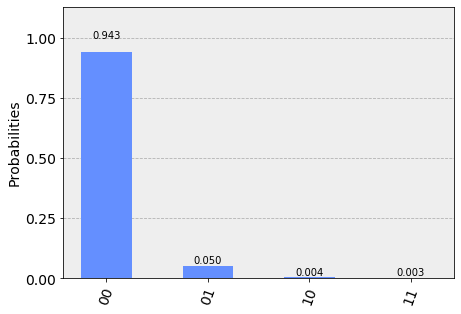

In [20]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [21]:
#As we can see, most of the results are 00 . 
#The other results are due to errors in the quantum computation.